<a href="https://colab.research.google.com/github/gabriela-148/IDS/blob/main/HW5/P5_Problem1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Project 5 Report**


**CSC346**


**11/8/23**
# Problem 1 - Python

In this project I used Google Colab to execute all the Python code. I also referenced the naiive_bayes Jupyter notebook in the IDS repository on GitHub.

To begin this project, I started by imported the wine data from a CSV file to a data frame. I imported the pandas and numpy libraries to do just that. After I imported that file, I printed out the data frame to check if the import was successful.

In [2]:
# Import the necessary libaries
import pandas as pd
import numpy as np

wineDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

wineDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


The next step is to cleanse the data which I could accomplish by checking if there are any missing values. Since the dataset is too large to check by hand, I checked using the is.na() method.

In [3]:
# Check to see if any NA or missing values in the wineDF
print(wineDF.isnull().sum())

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64


There are no null values so I continued with my analysis.

Next, I started to prepare the data. In this case, all of the column are categorical which is not ideal for Bayes' thereom or creating models. To change this, I had to convert all of the catergorical values to a numerical value. I achieved this using the LabelEncoder library in Python.

In [4]:
# Import label encoder library
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineDF.shape[1]):
    if wineDF.dtypes[i]=='object' or wineDF.dtypes[i]=='bool':
        encoded_wineDF[wineDF.columns[i]] = le.fit_transform(wineDF[wineDF.columns[i]])



print("-=========================")
print(wineDF)
print("-=========================")
encoded_wineDF



-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


Now, the data is classified as either 0 or 1. In the type column, 0 means red wine and 1 means white wine. In the alcohol and sugar columns, 0 means high and 1 means low.

Next, I created a contingency table for Type of Wine and alcohol content.

In [5]:
# Cross tabulation of Wine Type and Alcohol Content

p_crosstab = pd.crosstab(wineDF.Type, wineDF.Alcohol_flag)

print(p_crosstab)

Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084


Then, I created a barplot of the table from above.

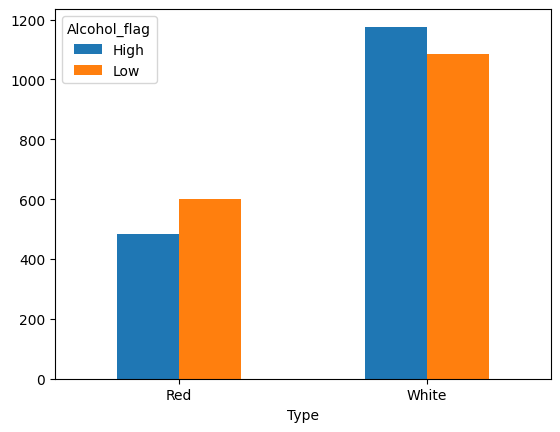

In [6]:
# Creating barplot

# x label rotation
barplot = p_crosstab.plot.bar(rot=0)

From this barplot I can conclude that white wine appears more often than red wine in this dataset. but also, white wine is more likely to have higher alchol content than red wine.

Next, I did the same table for type and sugar content.

In [7]:
# Cross tabulation of Wine Type and Sugar Content

p_crosstab = pd.crosstab(wineDF.Type, wineDF.Sugar_flag)

print(p_crosstab)

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


I created a barplot after that.

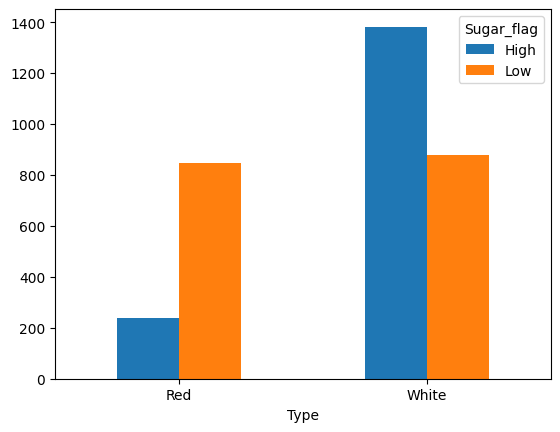

In [8]:
# Creating barplot

# x label rotation
barplot = p_crosstab.plot.bar(rot=0)

From this barplot I can conclude that white wine is more likely to have high sugar content compared to red wine.

Then, I calcuated the prior probability of the type of wine being either white or red.

In [25]:
# Total number of wines in DF
print(len(encoded_wineDF.Type))

# Total number of Red
redCount = 0
for item in encoded_wineDF.Type:
  if(item == 0):
    redCount += 1

print(redCount)

# Total number of White
whiteCount = 0
for item in encoded_wineDF.Type:
  if(item == 1):
    whiteCount += 1

print(whiteCount)

#Probability of Red
print( (redCount/len(encoded_wineDF.Type) * 100))

#Probability of White
print( (whiteCount/len(encoded_wineDF.Type) * 100))



3345
1085
2260
32.436472346786246
67.56352765321375


Based off the calculations above, the probability that a wine from this list would be Red is around 32% and the probability the wine is white is around 67%.

Next, I calculated the probability of high and low alcohol content.

In [22]:
# Total number of alcohol flags in DF
print(len(encoded_wineDF.Alcohol_flag))

# Total number of high alcohol
highCount = 0
for item in encoded_wineDF.Alcohol_flag:
  if(item == 0):
    highCount += 1

print(highCount)

# Total number of low alcohol
lowCount = 0
for item in encoded_wineDF.Alcohol_flag:
  if(item == 1):
    lowCount += 1

print(lowCount)

#Probability of high alcohol
print( (highCount/len(encoded_wineDF.Alcohol_flag) * 100))

#Probability of low alcohol
print( (lowCount/len(encoded_wineDF.Alcohol_flag) * 100))

3345
1661
1684
49.65620328849029
50.34379671150971


Based on the calcuations I made, the probability that the wine has a high alcohol content is around 49% and the probability the alcohol content is low is around 50%.

Followed by probability of high and low sugar content.

In [23]:
# Total number of sugar content data in DF
print(len(encoded_wineDF.Sugar_flag))

# Total number of high sugar
highCount = 0
for item in encoded_wineDF.Sugar_flag:
  if(item == 0):
    highCount += 1

print(highCount)

# Total number of low sugar
lowCount = 0
for item in encoded_wineDF.Sugar_flag:
  if(item == 1):
    lowCount += 1

print(lowCount)

#Probability of high sugar
print( (highCount/len(encoded_wineDF.Sugar_flag) * 100))

#Probability of low sugar
print( (lowCount/len(encoded_wineDF.Sugar_flag) * 100))

3345
1619
1726
48.40059790732437
51.59940209267564


Based on the calculations I made, the probability the wine has a high sugar content is 48% and the prbability the wine has a low sugar content is 51%.

Then by the conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red). I used the .shape[0] method in order to help the calculations go smoother as the for loop would have gotten more complicated to run successfully.

In [34]:
# Probability that alcohol is high and the type is Red :
highRedCount = wineDF[(encoded_wineDF['Type'] == 0) & (encoded_wineDF['Alcohol_flag'] == 0)].shape[0]
print(highRedCount)

print(highRedCount / len(encoded_wineDF.Type) *100)

# Probability that alcohol is low and the type is Red :
lowRedCount = wineDF[(encoded_wineDF['Type'] == 0) & (encoded_wineDF['Alcohol_flag'] == 1)].shape[0]
print(lowRedCount)

print(lowRedCount / len(encoded_wineDF.Type) *100)

485
14.499252615844544
600
17.937219730941703


Given this calculations, I can see that the probability that a wine is Red and has a high alcohol content is around 14%. And the probability that a wine is Red and has a low alcohol content is around 17%.

Finally, I calculated the conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

In [36]:
# Probability that sugar is high and the type is Red :
highRedCount = wineDF[(encoded_wineDF['Type'] == 0) & (encoded_wineDF['Sugar_flag'] == 0)].shape[0]
print(highRedCount)

print(highRedCount / len(encoded_wineDF.Type) *100)

# Probability that sugar is low and the type is Red :
lowRedCount = wineDF[(encoded_wineDF['Type'] == 0) & (encoded_wineDF['Sugar_flag'] == 1)].shape[0]
print(lowRedCount)

print(lowRedCount / len(encoded_wineDF.Type) *100)

237
7.085201793721973
848
25.351270553064275


Given this calculations, I can see that the probability that a wine is Red and has a high sugar content is around 7%. And the probability that a wine is Red and has a low sugar content is around 25%.

Since I have now cleansed and prepped the data, I could start to test and train the data. In order to do this, I used the naiive bayes classifier GaussianNB. The reason I chose this over the other classifiers is that this is more general and fits better in the terms of my analysis. I used a 80:20 testing ratio first.

In [ ]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()


# Train the model using training set for approach #2
#NBmodel.fit(features, labels)

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,0:3]
y = encoded_wineDF.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)


      Type  Alcohol_flag  Sugar_flag
1783     1             1           0
110      0             1           0
2936     1             0           0
2326     1             1           1
612      1             1           0
...    ...           ...         ...
3074     1             0           1
2259     1             1           0
1524     0             0           1
1629     1             1           1
512      1             1           0

[2676 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
1779     1             1           0
3176     1             0           1
2544     1             0           0
1470     0             0           1
810      1             0           0
...    ...           ...         ...
1979     1             1           0
2923     1             0           0
1518     0             0           0
998      1             1           1
1342     0             0           0

[669 rows x 3 columns]


Now, I can test the accuracy of the model I created above using the matplot library.

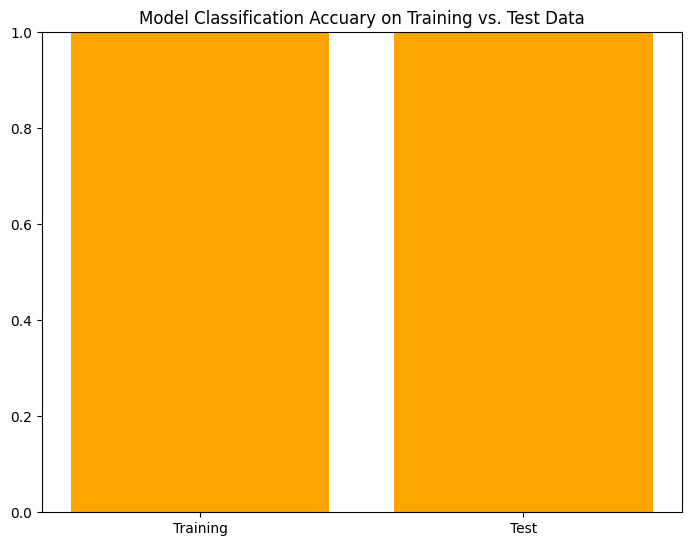

In [ ]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


Then I used a 75:25 testing ratio.

In [41]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()


# Train the model using training set for approach #2
#NBmodel.fit(features, labels)

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,0:3]
y = encoded_wineDF.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag  Sugar_flag
3005     1             0           0
647      1             0           1
561      1             0           1
1089     0             1           1
254      0             0           1
...    ...           ...         ...
2755     1             0           1
2259     1             1           0
2213     1             1           1
943      1             1           0
512      1             1           0

[3320 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
507      1             1           0
2223     1             1           0
770      1             1           1
1493     0             0           1
975      1             0           1
2366     1             1           1
1181     0             1           1
2591     1             0           1
434      0             0           1
361      0             0           1
3045     1             0           0
2698     1             0           0
2390     1             1           0
2384     1   

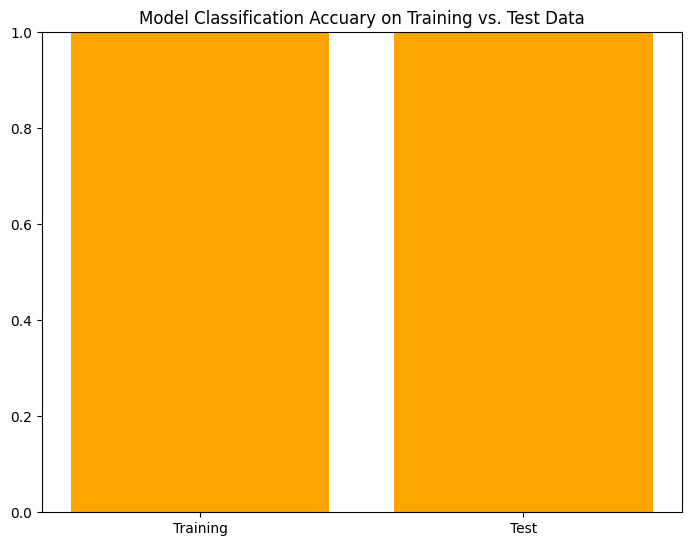

In [42]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


Next, was a 70:30.

In [43]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()


# Train the model using training set for approach #2
#NBmodel.fit(features, labels)

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,0:3]
y = encoded_wineDF.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag  Sugar_flag
3202     1             0           1
910      1             0           0
3059     1             0           0
3094     1             0           1
1606     1             1           0
...    ...           ...         ...
399      0             1           1
2259     1             1           0
2887     1             0           1
943      1             1           0
512      1             1           0

[3315 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
770      1             1           1
46       0             1           1
2591     1             0           1
839      1             0           0
1493     0             0           1
1967     1             1           0
361      0             0           1
2767     1             0           1
1181     0             1           1
434      0             0           1
507      1             1           0
2698     1             0           0
2384     1             1           0
1572     0   

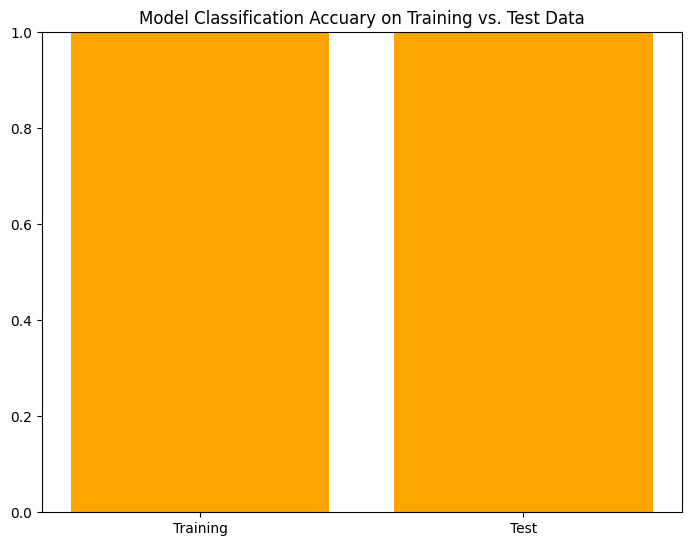

In [44]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


Followed by a 60:40 testing ratio.

In [45]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()


# Train the model using training set for approach #2
#NBmodel.fit(features, labels)

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,0:3]
y = encoded_wineDF.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag  Sugar_flag
2758     1             0           0
3306     1             0           0
260      0             1           1
2943     1             0           1
77       0             0           1
...    ...           ...         ...
3177     1             0           1
2259     1             1           0
1263     0             1           1
943      1             1           0
512      1             1           0

[3305 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
46       0             1           1
3095     1             0           0
2223     1             1           0
518      1             1           0
2370     1             1           0
3045     1             0           0
770      1             1           1
361      0             0           1
2591     1             0           1
1363     0             0           1
2366     1             1           1
250      0             1           1
2315     1             1           1
28       0   

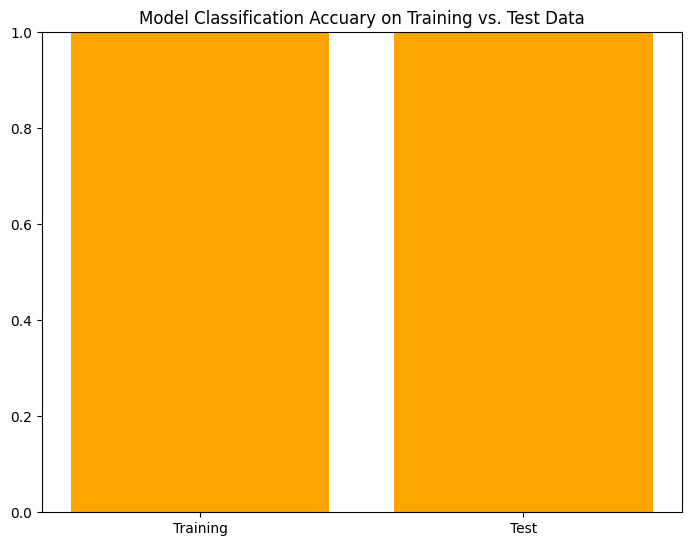

In [46]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


And finally, I used a 50:50 testing ratio.

In [47]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()


# Train the model using training set for approach #2
#NBmodel.fit(features, labels)

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,0:3]
y = encoded_wineDF.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag  Sugar_flag
2026     1             1           0
201      0             1           0
837      1             1           0
623      1             1           0
293      0             1           1
...    ...           ...         ...
2369     1             1           1
2259     1             1           0
1052     0             1           1
943      1             1           0
512      1             1           0

[3295 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
1181     0             1           1
518      1             1           0
434      0             0           1
1967     1             1           0
46       0             1           1
271      0             0           1
860      1             0           0
1572     0             0           1
1493     0             0           1
2591     1             0           1
3095     1             0           0
2767     1             0           1
1899     1             1           0
2922     1   

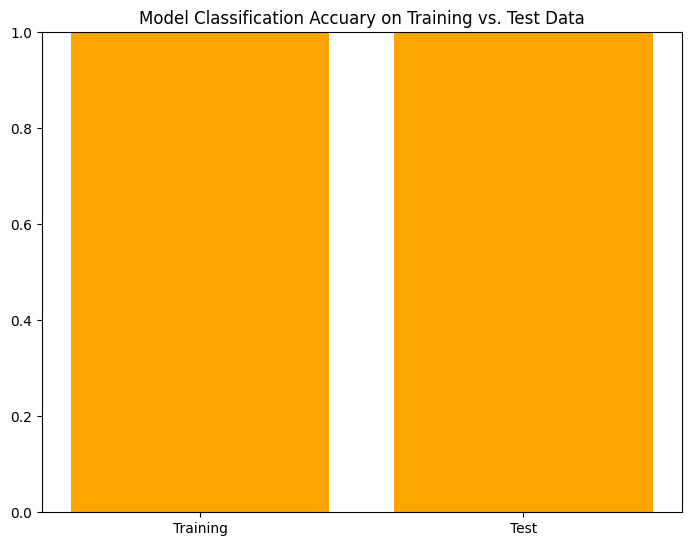

In [48]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


Based on the testing ratios I tested, I thought the 75:25 ratio was the best fit because it has a smaller test size which allows the model to be trained better. With highly trained models, it allows for the test data to be organized as accurately as possible and it helps leave little room for false positives or negatives.